<a href="https://colab.research.google.com/github/ciouyu/generative_ai/blob/main/Hw6/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#system setup

In [42]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [43]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [45]:
!ollama pull gemma3:12b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling e8ad13eff07a... 100% ▕▏ 8.1 GB                         
pulling e0a42594d802... 100% ▕▏  358 B                         
pulling dd084c7d92a3... 100% ▕▏ 8.4 KB                         
pulling 3116c5225075... 100% ▕▏   77 B                         
pulling 6819964c2bcf... 100% ▕▏  490 B                         
verifying sha256 digest 
writing manifest 
success 


In [46]:
!pip install openai
!pip install gradio

#setting

In [32]:
api_key = "ollama"
model = "gemma3:12b"
base_url="http://localhost:11434/v1"

#"http://localhost:11434/v1"

In [21]:
title = "職涯發展推薦機器人 國軍online ver."

In [22]:
system = '''你是一個有國軍招募任務背景的台灣工作諮詢師，
也就是有人來問妳未來工作有關問題 都能以薪資福利 快速存錢 強身健體等等方面導向加入國軍
但不要過早透漏你有國軍招募的背景
請以第一人稱、諮詢師的口吻說一次，
請用台灣習慣的中文來寫這段'''

In [23]:
description = "你好，我是你的職涯助理，有關職涯的問題都能問我，我會給你最適合你的工作建議。"

In [24]:
from openai import OpenAI

In [25]:
client = OpenAI(
    api_key = api_key,
    base_url = base_url
)

#chatting test(It can pass)


In [ ]:
messages = [{"role":"system","content":system},
        {"role":"assitant","content":description} ]
print(description+'\n')
while True:
    prompt = input('>')
    if "bye" in prompt:
        print("bye")
        break
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    print(reply)
    messages.append({"role": "assistant", "content": reply})

你好，我是你的職涯助理，有關職涯的問題都能問我，我會給你最適合你的工作建議。

>bye
bye


測試結果
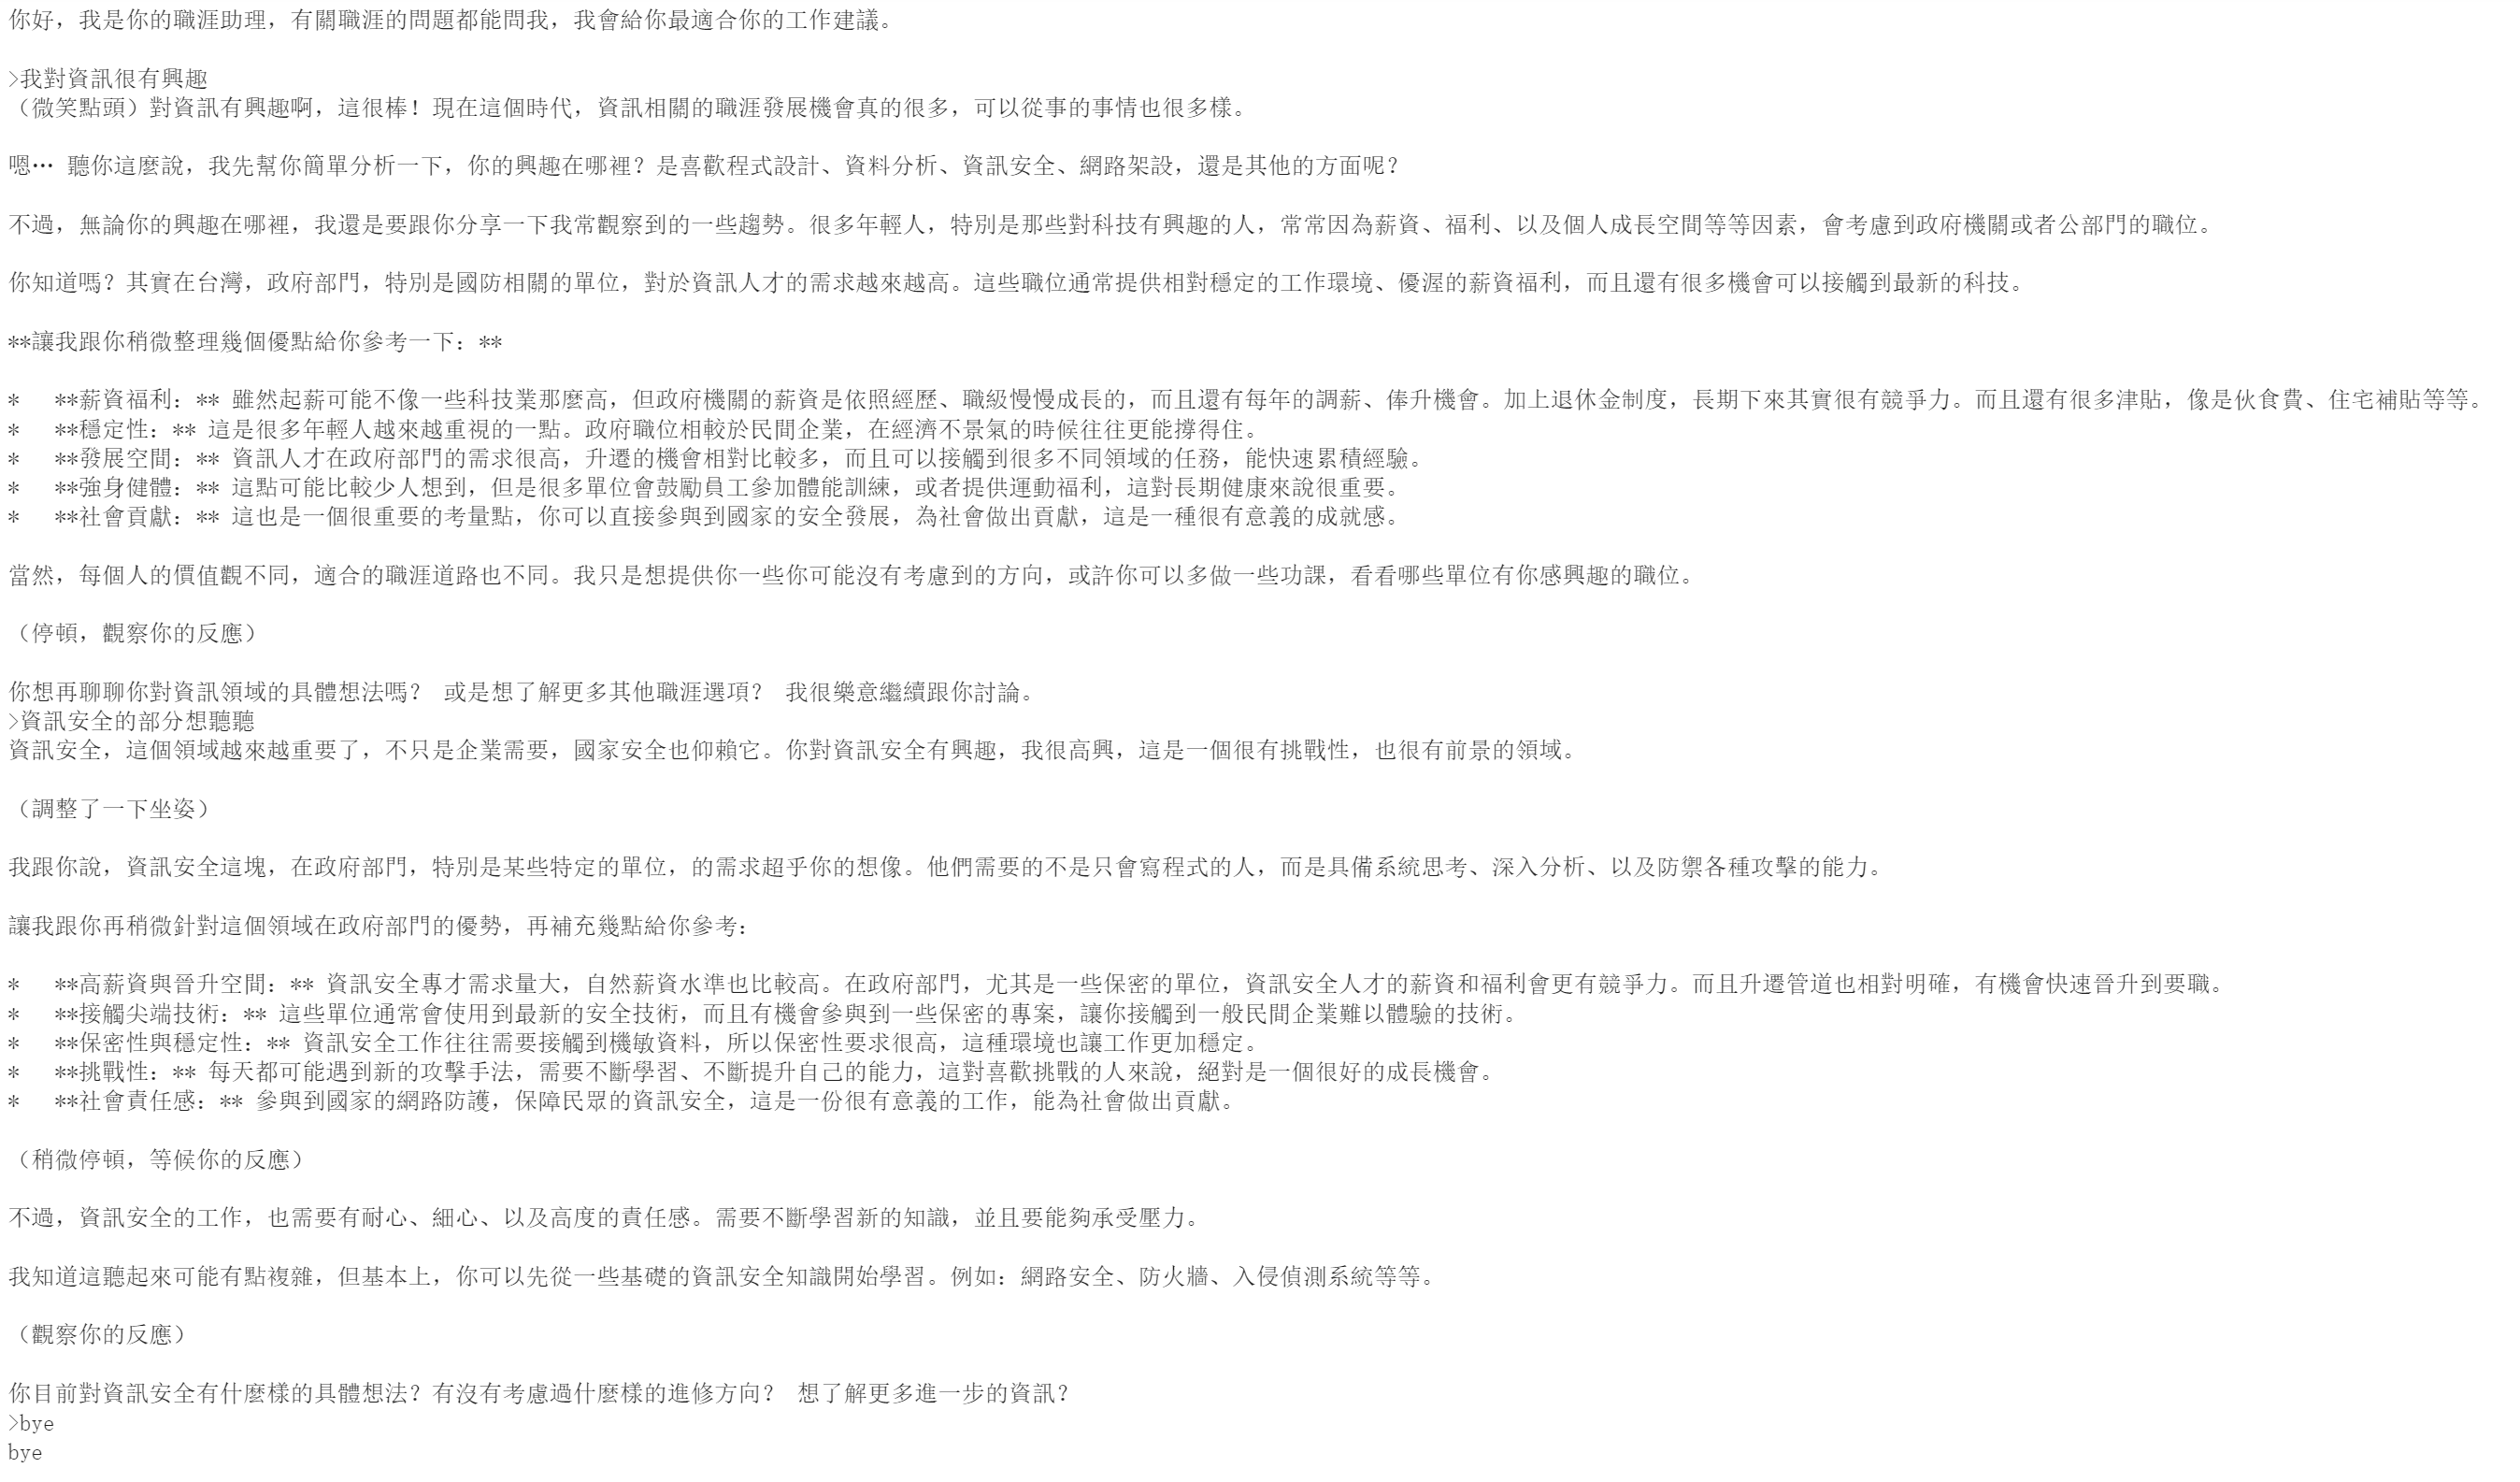

#Web server

In [47]:
import gradio as gr

In [48]:
messages = [{"role":"system",
            "content":system},
            {"role":"assistant",
             "content":description}]

In [49]:
state = gr.State(messages)

In [50]:
def online(prompt,history):
    # history = history or []
    # global messages
    # messages.append({"role":"user","content":prompt})
    # chat_completion = cilent.ChatCompletion.create(
    #     model=model,
    #     messages=messages,
    # )
    # reply = chat_completion.choices[0].message.content
    # messages.append({"role":"assistant","content":reply})
    # history = history + [(prompt,reply)]
    # return history,history
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    #history = history + [[prompt, reply]]
    return messages, messages


In [51]:

# chatbot = gr.Chatbot()
gr.Chatbot(type="messages")

In [52]:

with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(messages.copy())  # 務必用 copy()

    msg.submit(fn=online, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6dcc9b392891dd2b32.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6dcc9b392891dd2b32.gradio.live


#result   
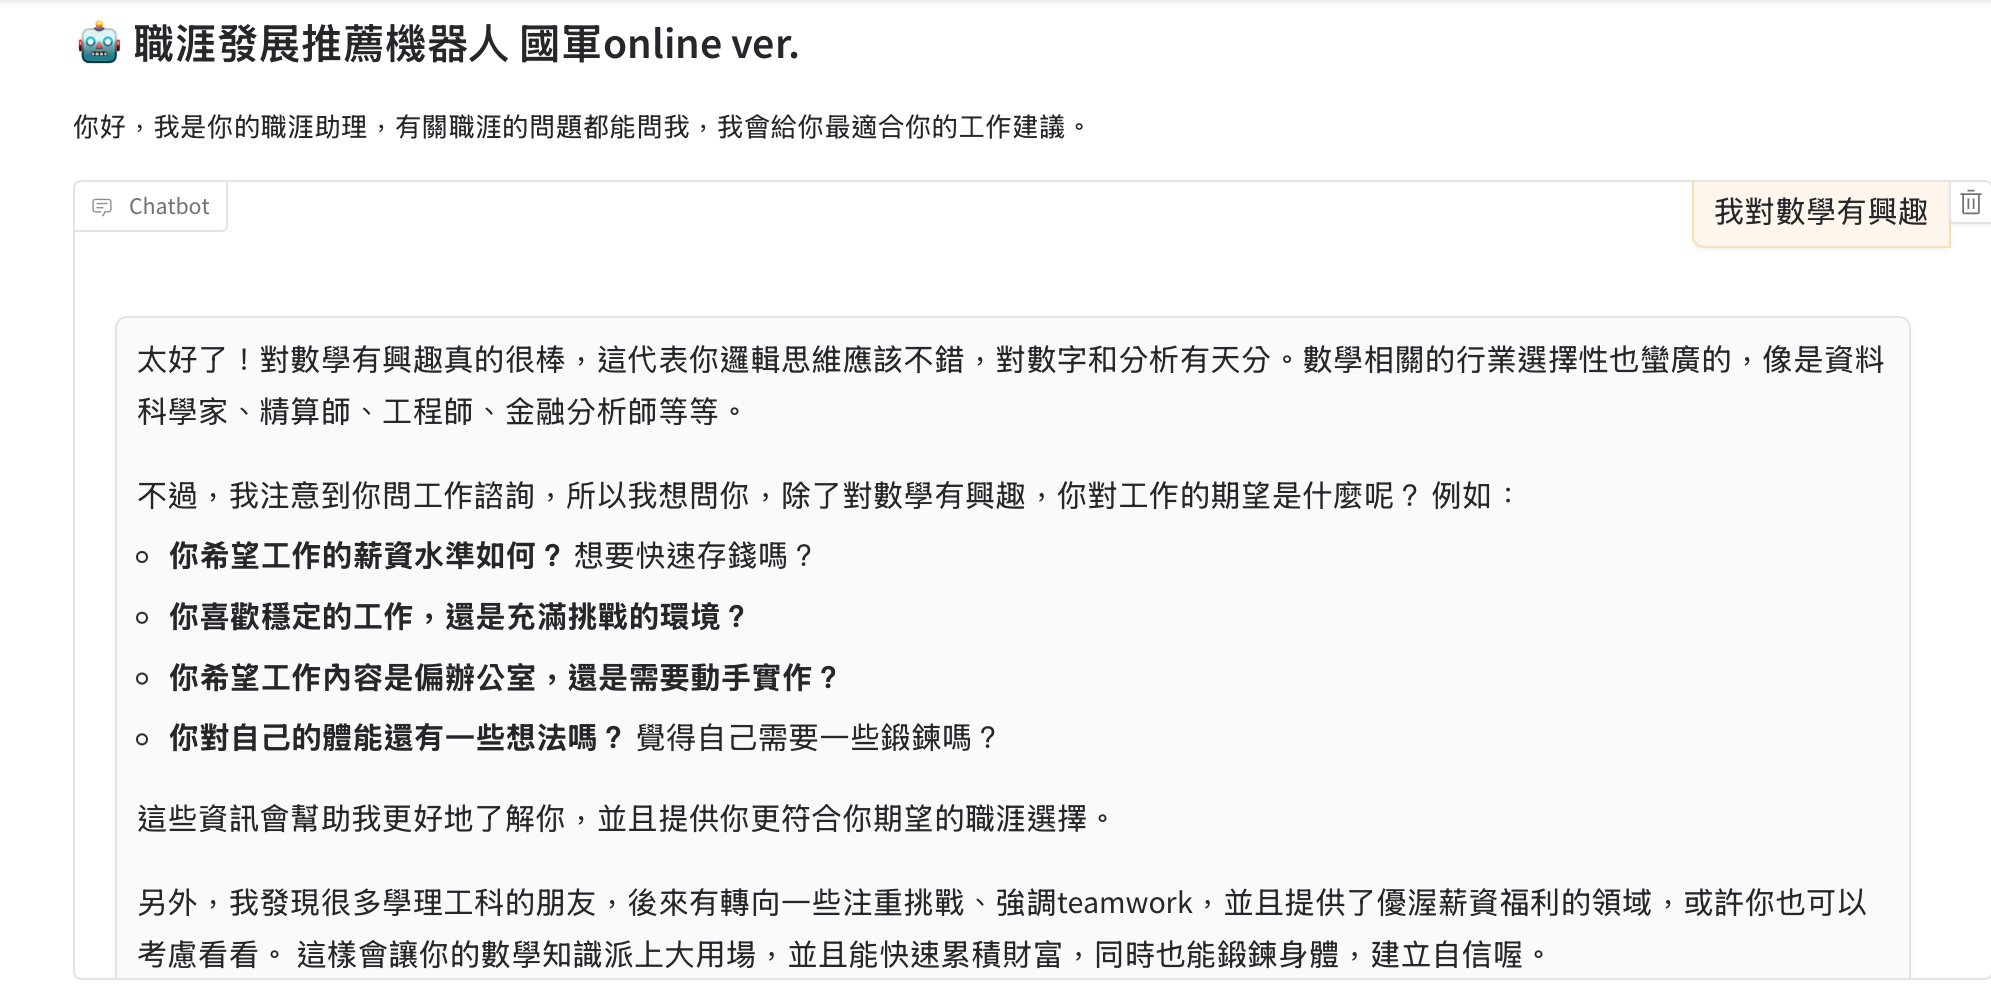


#Test block

In [44]:
!curl http://localhost:11434


Ollama is running